# A Data Driven Journey Through Netflix Viewership

#### Objective :
With the use of python and python libraries: seaborn, matplotlib.pyplot, pandas and numpy I clean and extract viewer analytics. I uncover a number of patterns and trends through this project which previously were hidden. I seek to extract all the possible insights and figure out what amasses the most viewership

# Questions About Our Dataset

#### What does our csv file look like and can it read into a pandas dataframe?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Netflix_Engagement.csv')

df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","persian empire,empire,5th century b.c.,achaeme...",NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","producer,three word title,headstrong,arranged ...",The film follows headstrong Ginny who meets Su...
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show'],youtube video,MsMojo counts down the top 10 Wednesday (2022)...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']","prequel,queen,historical,england,queen charlot...","Betrothed against her will to King George, you..."


#### How big is our data set?

With +18,000 entries to analyze we are working with a moderate to big sized data set.

In [4]:
df.shape

(18332, 9)

#### What are the key attributes available for each show (e.g., title, genre, release date, duration, language)?

In [5]:
df.dtypes

Title                   object
Available Globally?     object
Release Date            object
Hours Viewed             int64
Number of Ratings      float64
Rating                 float64
Genre                   object
Key Words               object
Description             object
dtype: object

#### Unique values can play an integral part in making or breaking insights from the data. By finding the instances where there are unique values I infer a number of things:


With only 1600 unique release dates spread across 20 years, it's unlikely that there are enough movies released on any single day to discern meaningful trends or patterns. Analyzing data at the daily level would result in sparse data points for each day, making it challenging to draw reliable conclusions or insights.

Instead of analyzing data at the daily level, it's more practical to aggregate the data into larger time intervals, such as months. By grouping movies based on their release month, we can aggregate data points for each month over the 20-year period. This aggregation results in a more substantial amount of data for each time interval, allowing for more robust analysis and trend identification.

How diverse and skewed is our data set?

Given that there are 18,000 unique movie titles but only 90 unique ratings, it's logical to infer that multiple movies may have the same rating. This could imply that the ratings are clustered around a few common values, suggesting that viewers tend to rate movies similarly OR that the rating system may be limited in granularity.

The +9000 unique key words can play an integral role in content based insights/recommendations. Each keyword in the dataset represents a specific aspect or characteristic of movies. These keywords can capture various elements such as genre, theme, setting, plot, mood, tone, style, and more. By categorizing keywords into multiple dimensions or attributes, you can derive deeper insights into content characteristics and audience preferences. For example, you can analyze which genres are most prevalent, which themes are trending, which settings are most popular, or which moods elicit the best viewer ratings. These insights can inform content strategy, recommendation algorithms, and marketing campaigns.

In [6]:
df.nunique()

Title                  18214
Available Globally?        2
Release Date            1665
Hours Viewed             712
Number of Ratings       7524
Rating                    87
Genre                    679
Key Words               9687
Description             8789
dtype: int64

#### Normalizing the hours viewed helps get a better understanding of scale for larger values.  Conceptualizing datasets with values ranging from hundreds of millions to thousands can be challenging and inconvenient for interpretation. By manually scaling the "Hours Viewed" attribute by a factor of 1 million, we achieve a more familiar and manageable scale for reference and comprehension. This process enables stakeholders to grasp the relative significance of each data point more effectively, facilitating clearer insights and decision-making.


I added this specifially after encountering troubles graphing values with the 1e shit.

In [7]:
df['Hours Viewed']= df['Hours Viewed'] / 1000000
df.describe()

,Hours Viewed,Number of Ratings,Rating
count,18332.000000,1.422200e+04,14222.000000
mean,5.120205,4.613511e+04,6.509056
std,18.671223,1.486087e+05,1.227839
min,0.100000,5.000000e+00,1.200000
25%,0.200000,3.432500e+02,5.800000
50%,0.700000,2.594000e+03,6.600000
75%,3.400000,1.935500e+04,7.300000
max,812.100000,2.829797e+06,10.000000


#### How complete and consistent is the metadata across the dataset?

In [8]:
not_null = df.notnull().sum()
not_null_columns=["Title","Available Globally?","Release Date","Hours Viewed","Number of Ratings","Rating","Genre","Key Words","Description"]

not_null_records = not_null[not_null_columns]

not_null_records

Title                  18332
Available Globally?    18332
Release Date            4879
Hours Viewed           18332
Number of Ratings      14222
Rating                 14222
Genre                  15761
Key Words              12801
Description            10619
dtype: int64

In [9]:
null_records = df.isnull().sum()
null_records

Title                      0
Available Globally?        0
Release Date           13453
Hours Viewed               0
Number of Ratings       4110
Rating                  4110
Genre                   2571
Key Words               5531
Description             7713
dtype: int64

In [10]:
for index, column in enumerate(not_null_columns):
    plt.bar(column)

TypeError: bar() missing 1 required positional argument: 'height'

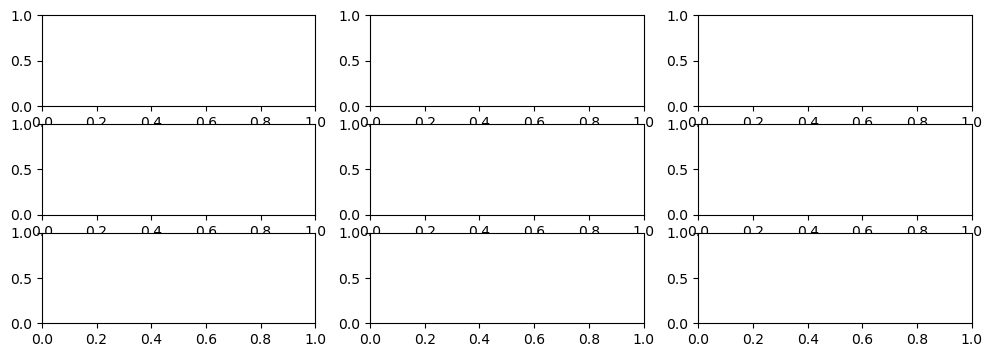

In [11]:
fig, axes = plt.subplots(3,3,figsize=(12,4))




In [12]:
is_not_global = 'No'

is_global = 'Yes'

global_index = df['Available Globally?'] != is_not_global

not_global_index = df['Available Globally?'] == is_not_global

global_df = df[global_index]

not_global_df = df[not_global_index]

In [13]:
global_data=len(global_df)

In [14]:
not_global_data=len(not_global_df)

([<matplotlib.patches.Wedge at 0x13eef5590>,
 [Text(0.7843214818420081, 0.7712585903062324, 'Global'),
  Text(-0.7843215179472278, -0.7712585535894929, 'Not Global')])

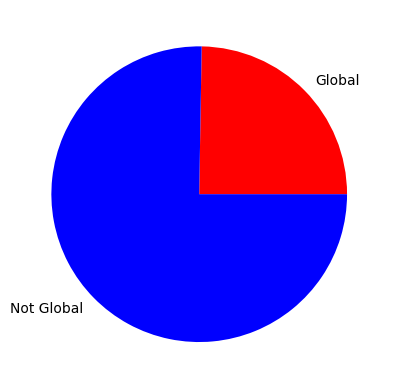

In [15]:
plt.figure()

plt.pie([global_data,not_global_data], labels=['Global','Not Global'],colors=['red','blue'])

In [16]:
global_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18212    False
18216    False
18220    False
18282    False
18295    False
Length: 4534, dtype: bool

In [17]:
not_global_df.duplicated().sum()

52

In [18]:
rld_index = global_df['Release Date'].isnull() != True 

global_df = global_df[rld_index]

global_df['Release Date'].isnull().sum()

0

In [19]:
global_df['Release Date'] = pd.to_datetime(global_df['Release Date'])

global_df['Release Date'].isnull().any()

False

<function matplotlib.pyplot.show(close=None, block=None)>

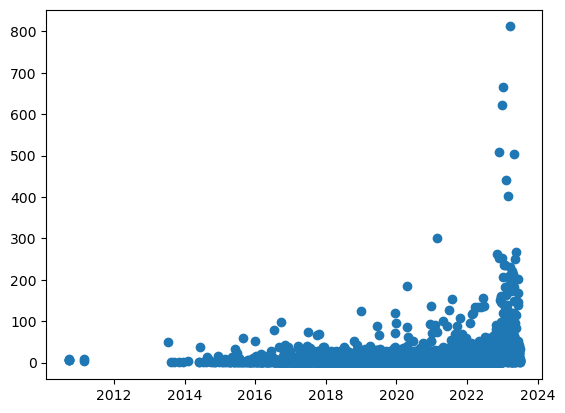

In [20]:
plt.figure()
plt.scatter(global_df['Release Date'],global_df['Hours Viewed'], marker='o')
plt.show

In [21]:
global_df['Release Date'].dt.month

0         3
1         1
2        12
3        11
4         5
         ..
18212     6
18216     7
18220     9
18282     4
18295     8
Name: Release Date, Length: 3932, dtype: int32

In [22]:
global_df['Month']= global_df['Release Date'].dt.month_name()
global_monthly_df = global_df.groupby('Month')['Hours Viewed'].mean()

index = ['January','February','March','April','May','June','July','August','September','October','November','December']
global_monthly_df = global_monthly_df.reindex(index)

global_monthly_df 

Month
January      16.389437
February     16.894718
March        15.116667
April        13.838580
May          13.227986
June         10.950307
July          7.877740
August        6.389869
September     6.724286
October       7.688550
November      8.094780
December     14.298446
Name: Hours Viewed, dtype: float64

<BarContainer object of 12 artists>

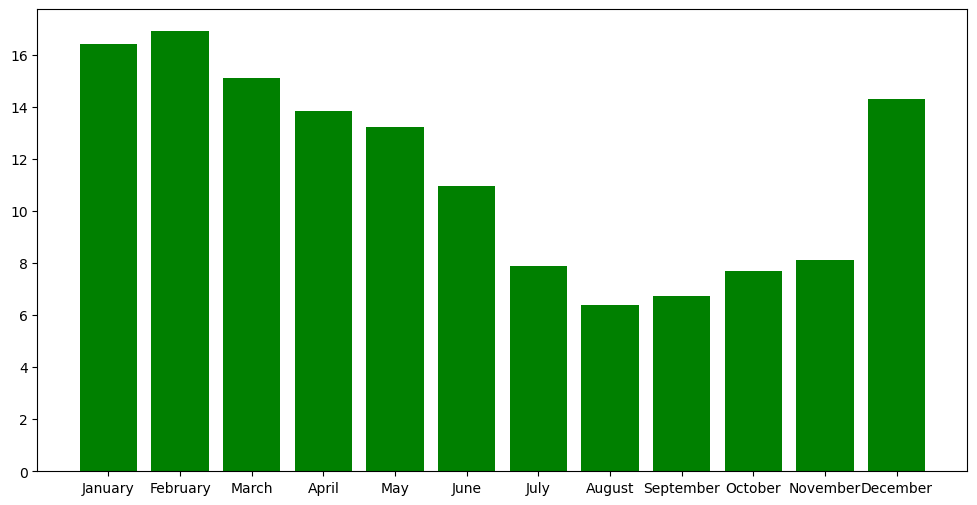

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(index, global_monthly_df, color='green')

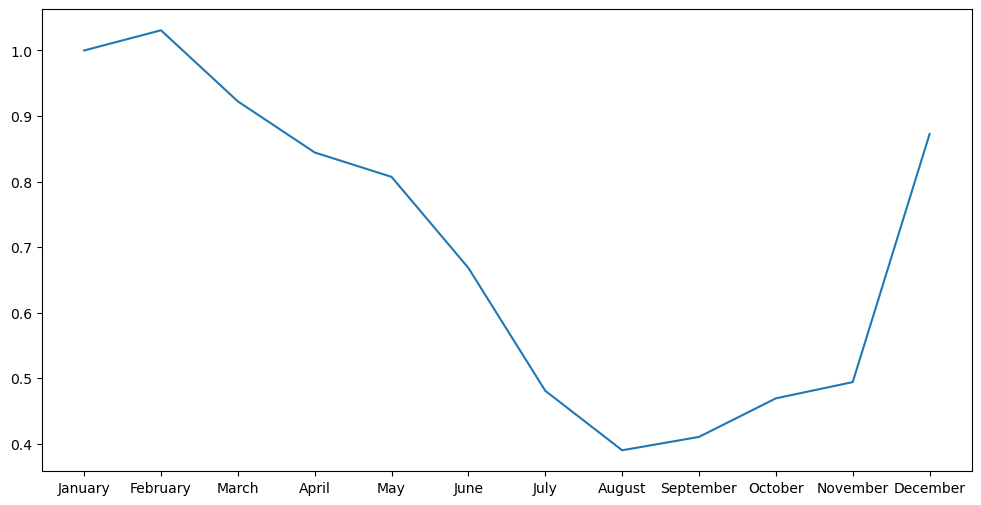

In [24]:
viewer_growth = global_monthly_df/global_monthly_df.iloc[0]
plt.figure(figsize=(12,6))
plt.plot(viewer_growth)

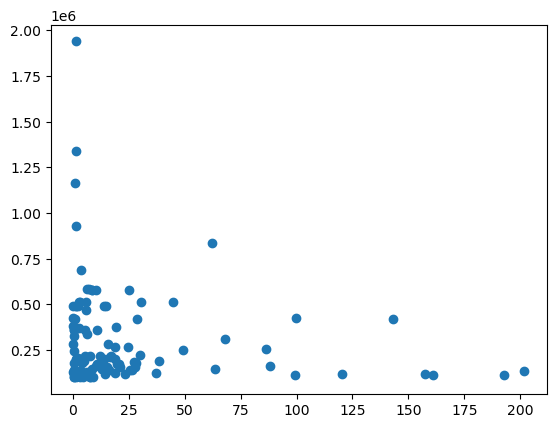

In [25]:
top_global_df = global_df[global_df['Number of Ratings'] > 100000]
top_global_df = top_global_df.sort_values('Number of Ratings', ascending=False)
top_global_df = top_global_df.sort_values('Hours Viewed', ascending=True).head(150)
plt.figure()
plt.scatter(top_global_df['Hours Viewed'],top_global_df['Number of Ratings'])

In [26]:
#find what is the produces the most hours viewed and number of ratings 